In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2025-11-05 22:32:54.874423: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-05 22:32:54.976574: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-05 22:32:59.216902: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 22:33:12.445284: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   # Normalize data


In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Convert image to 1D
    layers.Dense(128, activation='relu'),   # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])


/home/sanji/.local/share/pipx/venvs/notebook/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-05 22:33:52.112036: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8375 - loss: 0.6466 - val_accuracy: 0.9018 - val_loss: 0.3603
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9044 - loss: 0.3419 - val_accuracy: 0.9179 - val_loss: 0.2947
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.9179 - loss: 0.2930 - val_accuracy: 0.9255 - val_loss: 0.2663
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9266 - loss: 0.2626 - val_accuracy: 0.9323 - val_loss: 0.2409
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9330 - loss: 0.2395 - val_accuracy: 0.9365 - val_loss: 0.2228


In [5]:
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9365 - loss: 0.2228
Test Accuracy: 0.9365000128746033


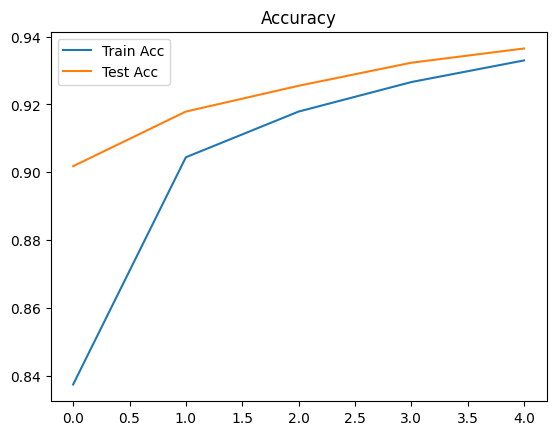

In [6]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.title('Accuracy')
plt.show()


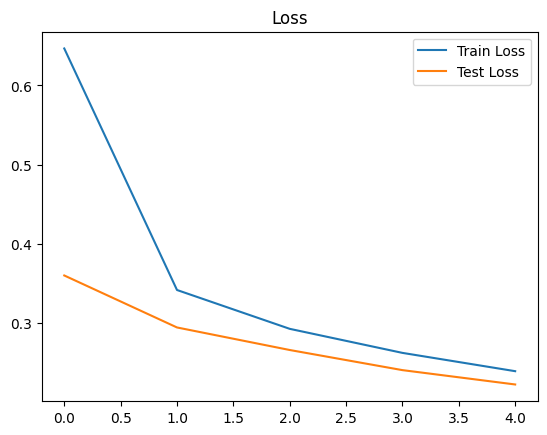

In [7]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss')
plt.show()
